### Titanic: Machine Learning from Disaster

### Aim: The goal of this project is to predict whether a passenger survived the sinking of Titanic or not!!

In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing Titanic Data
t_data= pd.read_csv('train.csv')
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
t_data.shape

(891, 12)

In [4]:
print('Total number of columns: ', len(t_data.columns))

Total number of columns:  12


In [5]:
print('Columns having NaN values:\n',t_data.columns[t_data.isna().any()].tolist())

Columns having NaN values:
 ['Age', 'Cabin', 'Embarked']


In [6]:
t_data['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [7]:
#listing features which are not relevant for the analysis
columns_to_drop=['Name','Fare','Cabin','Ticket']


In [8]:
#dropping irrelvant features
t_data.drop(columns_to_drop, inplace= True, axis=1)

In [9]:
t_data.head() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [10]:
#checking the magnitute of NaN values in Age, Embarked columns
t_data.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Embarked       889
dtype: int64

In [11]:
#displaying NaN values data of Embarked column
t_data[t_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,62,1,1,female,38.0,0,0,NaN
829,830,1,1,female,62.0,0,0,NaN


In [12]:
#dropping Nan values of embarked column
t_data=t_data.dropna(subset=['Embarked'])

In [13]:
#quality check
t_data[t_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [14]:
#Replacing Age NaN values with Median age
t_data['Age'].fillna(t_data['Age'].median(),inplace= True)

In [15]:
t_data[t_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [16]:
#Quality check on complete dataset
t_data.columns[t_data.isna().any()].tolist()

[]

In [17]:
#quality check
t_data['Age'].isna().any()

False

In [18]:
#Checking unique values in Embarked
t_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [19]:
#Handling Boolean values
t_data['Sex'].replace({'male':1,'female':0},inplace= True)
t_data['Embarked'].replace({'S':1,'C':2,'Q':3},inplace= True)


In [20]:
#final table
t_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,1
1,2,1,1,0,38.0,1,0,2
2,3,1,3,0,26.0,0,0,1
3,4,1,1,0,35.0,1,0,1
4,5,0,3,1,35.0,0,0,1
5,6,0,3,1,28.0,0,0,3
6,7,0,1,1,54.0,0,0,1
7,8,0,3,1,2.0,3,1,1
8,9,1,3,0,27.0,0,2,1
9,10,1,2,0,14.0,1,0,2


In [21]:
t_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.315152,0.524184,0.382452,1.362205
std,256.998173,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,3.000000


In [22]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Embarked       889 non-null int64
dtypes: float64(1), int64(7)
memory usage: 62.5 KB


### Making Titanic Survival Predictions using Logistic Regression Model


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#splitting the dataset into training and test
train_rf,test_rf= train_test_split(t_data,train_size=0.8, test_size=0.2, random_state=42)


removing columns not required for training/testing the model

In [25]:
target_train=train_rf['Survived']
target_test=test_rf['Survived']
train_rf.drop(['Survived','PassengerId'], inplace= True, axis=1)
test_rf.drop(['Survived','PassengerId'], inplace= True, axis=1)

C:\Users\vivek\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
train_rf.head(5)


,Pclass,Sex,Age,SibSp,Parch,Embarked
708,1,0,22.0,0,0,1
240,3,0,28.0,1,0,2
382,3,1,32.0,0,0,1
792,3,0,28.0,8,2,1
683,3,1,14.0,5,2,1


In [27]:
test_rf.head(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked
281,3,1,28.0,0,0,1
435,1,0,14.0,1,2,1
39,3,0,14.0,1,0,2
418,2,1,30.0,0,0,1
585,1,0,18.0,0,2,1


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
target_train.head()

708    1
240    0
382    0
792    0
683    0
Name: Survived, dtype: int64

In [30]:
#creating and fitting random forest
random_forest_titanic= RandomForestClassifier(n_estimators=1000)
random_forest_titanic.fit(train_rf,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
#make predictions
predictions= random_forest_titanic.predict(test_rf)

In [32]:
from sklearn.metrics import accuracy_score
#Evaluation for train data
train_predictions = random_forest_titanic.predict(train_rf)
train_accuracy= accuracy_score(target_train,train_predictions)
print('The train accuracy is:',train_accuracy*100,'%')
#Evaluation for test data
test_predictions = random_forest_titanic.predict(test_rf)
test_accuracy= accuracy_score(target_test,test_predictions)
print('The test accuracy is:',test_accuracy*100,'%')

The train accuracy is: 93.67088607594937 %
The test accuracy is: 81.46067415730337 %


Analyzing the feature importance

In [33]:
import matplotlib.pyplot as plt

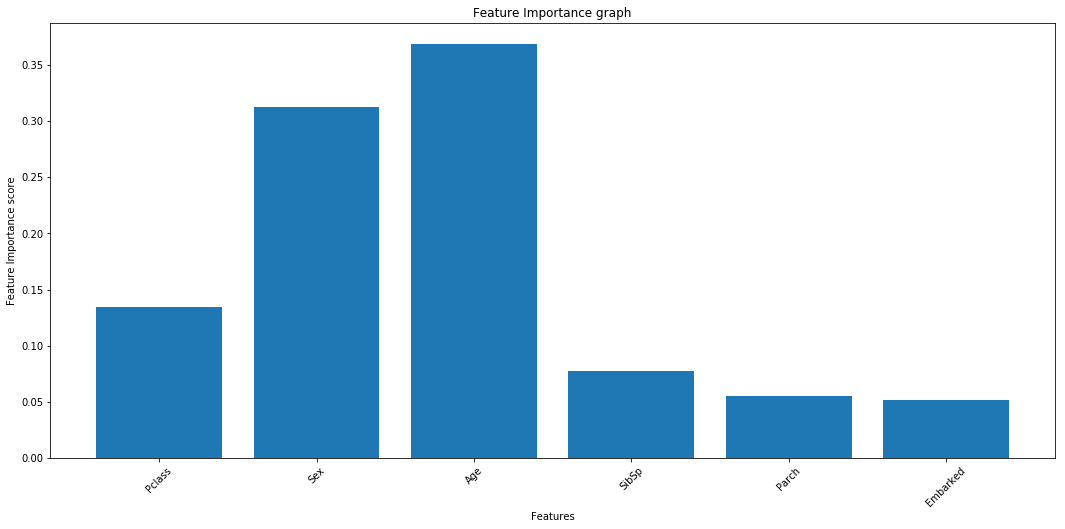

In [34]:
#Features importance
features=list(train_rf)
feature_importance= random_forest_titanic.feature_importances_
plt.figure(figsize=(18,8))
plt.bar(features,feature_importance)
plt.xticks(features,rotation=45)
plt.title('Feature Importance graph')
plt.ylabel('Feature Importance score')
plt.xlabel('Features')
plt.show()



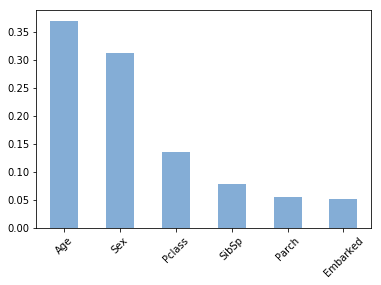

In [35]:
#sorting the feature importance for a better view
sorted_features=pd.Series(feature_importance, features).sort_values(ascending= False)
#plotting bar graph
sorted_features.plot(kind='bar',x='Features',y='Feature Importance score',color =(0.4, 0.6, 0.8, 0.8),rot=45)
plt.show()

### Making Titanic Survival Predictions using Logistic Regression Model


In [36]:
from sklearn.linear_model import LogisticRegression
#creating Logistic Regression model 
logmodel= LogisticRegression()
logmodel.fit(train_rf,target_train)
predictions_LR= logmodel.predict(test_rf)

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
#Evaluation for train data
train_predictions_LR = logmodel.predict(train_rf)
train_accuracy_LR= accuracy_score(target_train,train_predictions_LR)
print('The train accuracy is:',train_accuracy_LR*100,'%')
#Evaluation for test data
test_predictions_LR = logmodel.predict(test_rf)
test_accuracy_LR= accuracy_score(target_test,test_predictions_LR)
print('The test accuracy is:',test_accuracy_LR*100,'%')

The train accuracy is: 80.59071729957806 %
The test accuracy is: 78.65168539325843 %


### Making Titanic Survival Predictions using SVM Model

In [38]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix


In [39]:
#creating SVM Classifier
t_data_clf= svm.SVC(kernel='linear')
#train the model using train datasets
t_data_clf.fit(train_rf,target_train)
#Predict the response for test dataset
Predictions_svm = t_data_clf.predict(test_rf)


In [40]:
#Evaluation for train data
train_predictions_svm = t_data_clf.predict(train_rf)
train_accuracy_svm= accuracy_score(target_train,train_predictions_svm)
print('The train accuracy is:',train_accuracy_svm*100,'%')
#Evaluation for test data
test_predictions_svm = t_data_clf.predict(test_rf)
test_accuracy_svm= accuracy_score(target_test,test_predictions_svm)
print('The test accuracy is:',test_accuracy_svm*100,'%')


The train accuracy is: 78.34036568213783 %
The test accuracy is: 79.7752808988764 %


### Making Titanic Survival Predictions using XGBoost Model

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
    

In [67]:
X= t_data.iloc[:,2:8]

In [79]:
y= t_data.iloc[:,1]

In [80]:
X_train, X_test,y_train,y_test= train_test_split(X, y,test_size=0.2,random_state=42)

In [81]:
t_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,1
1,2,1,1,0,38.0,1,0,2
2,3,1,3,0,26.0,0,0,1
3,4,1,1,0,35.0,1,0,1
4,5,0,3,1,35.0,0,0,1


In [82]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [83]:
#creating XGB Classifier
xclas=XGBClassifier()
xclas.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [84]:
#Predict the response for test dataset
Predictions_xgb = xclas.predict(X_test)

In [85]:
#Evaluation for train data
train_predictions_xgb = xclas.predict(X_train)
train_accuracy_xgb= accuracy_score(y_train,train_predictions_xgb)
print('The train accuracy is:',train_accuracy_xgb*100,'%')
#Evaluation for test data
test_predictions_xgb = xclas.predict(X_test)
test_accuracy_xgb= accuracy_score(y_test,test_predictions_xgb)
print('The test accuracy is:',test_accuracy_xgb*100,'%')


The train accuracy is: 85.51336146272855 %
The test accuracy is: 84.26966292134831 %


### Since XGBoost model provides the highest accuracy, it will be used to make predictions for the test dataset.

Making predictions for Test data

In [86]:
#importing Titanic test data
t_data_test=pd.read_csv('test.csv')
t_data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
#checking test data
t_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [88]:
#listing columns to drop from test dataset
col_to_drop = ['Name','Fare','Cabin','Ticket']
t_data_test.drop(col_to_drop, inplace= True, axis =1 )

In [89]:
#Taking care of boolean values
t_data_test['Sex']=t_data_test['Sex'].replace({'male':1,'female':0})


In [90]:
t_data_test['Embarked']=t_data_test['Embarked'].replace({'S':1,'C':2,'Q':3})


In [91]:
print('Columns having NaN values:\n',t_data_test.columns[t_data_test.isna().any()].tolist())

Columns having NaN values:
 ['Age']


In [92]:
t_data_test['Age']=t_data_test['Age'].fillna(round(t_data_test['Age'].median()))

In [93]:
t_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Embarked       418 non-null int64
dtypes: float64(1), int64(6)
memory usage: 22.9 KB


In [94]:
col_to_drop2= ['PassengerId']
t_data_test1=t_data_test.drop(col_to_drop2,axis=1)

In [95]:
t_data_test1.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,3
1,3,0,47.0,1,0,1
2,2,1,62.0,0,0,3
3,3,1,27.0,0,0,1
4,3,0,22.0,1,1,1


In [96]:
#make predictions using XGBoost
predictions_test= xclas.predict(t_data_test1)

In [97]:
predictions_Data= pd.Series(predictions_test)
predictions_Data.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [98]:
t_data_test['survived']=predictions_Data

In [99]:
t_data_test[['PassengerId','survived']]

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [100]:
t_data_test[['PassengerId','survived']].to_csv('final_submission.csv',index= False)

### Practice

In [ ]:
#taking top 5 features
sorted_features= sorted_features.head(5)
#plotting bar graph
sorted_features.plot(kind='bar',x='Features',y='Feature Importance score',color =(0.4, 0.6, 0.8, 0.8),rot=45)
plt.show()

In [ ]:
#checking correlation between features
import seaborn as sns
#create correlation dataframe
t_data2=t_data[sorted_features.index]
corr_df=t_data2.corr()
f,ax= plt.subplots(figsize=(12,10))
sns.heatmap(corr_df,ax=ax,cmap ="YlGnBu",linewidths = 0.1 )
plt.xticks(range(len(corr_df.columns)),corr_df.columns,rotation=30)

plt.yticks(range(len(corr_df.columns)),corr_df.columns)

In [ ]:
#Splitting the dataset with above mentioned features into train and test split
train_rf2,test_rf2= train_test_split(t_data2,train_size=.8, test_size=.2,random_state=42)


In [ ]:
t_data2.head()

It can be seen there is no significant correlation between the features. So now we will apply the model to only these features.












In [ ]:
#creating and fitting random forest classifier
random_forest_titanic_2= RandomForestClassifier(n_estimators=1000)
random_forest_titanic_2.fit(train_rf2,target_train)

In [ ]:
#evaluate the model

# for train data
train_predictions_2 = random_forest_titanic_2.predict(train_rf2)

train_accuracy_2 = accuracy_score(target_train, train_predictions_2)

print("The train accuracy is:",train_accuracy_2*100,"%")

# for test data
test_predictions_2 = random_forest_titanic_2.predict(test_rf2)

test_accuracy_2 = accuracy_score(target_test,test_predictions_2)

print("The test accuracy is:",test_accuracy_2*100,"%")

In [ ]:
import lightgbm as lgb


In [ ]:
#creating LightGBM classifier
d_train= lgb.Dataset(X_train,y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
t_clf=lgb.train(params,d_train,100)


In [ ]:
#making predictions
y_pred=t_clf.predict(X_test)

#convert into binary values
n= len(X_test)
for i in range(0,99):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0